In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('./2023-cleaned-survey.xlsx')


In the following cells, I using the .unique() function to find the unique answers provided by the participants to that I could plot the Distribution of Years in Creative Practice vs Age of the Demographic.

In [3]:
data['Years of Professional Creative Practice'].unique()

array([nan, '6-10 years', '11-20 years', '0-5 years', '20+ years'],
      dtype=object)

In [4]:
data['Age'].unique()

array(['Older Adults (Age 65+)', 'Children/Youth (Age 0-18)',
       'Adults (Age 25-64)', 'Prefer not to say',
       'Young Adults (Age 19-24)'], dtype=object)

Then, I check the tatal amount of valid answer of years of professional creative practice for different age group in the column 'Age'.

In [5]:
(data[data['Age'] == 'Children/Youth (Age 0-18)']['Years of Professional Creative Practice'].notna()).sum()

6

In [6]:
(data[data['Age'] == 'Young Adults (Age 19-24)']['Years of Professional Creative Practice'].notna()).sum()

12

In [7]:
(data[data['Age'] == 'Adults (Age 25-64)']['Years of Professional Creative Practice'].notna()).sum()

6

In [8]:
(data[data['Age'] == 'Older Adults (Age 65+)']['Years of Professional Creative Practice'].notna()).sum()

14

The following cell is cleaning the data by excluding the answer which is meaningless, such as 'Prefer not to say'.

In [9]:
filtered_data = data[(data['Age'] != 'Prefer not to say') & (data['Years of Professional Creative Practice'].notna())]

# Q1 Distribution of Years in Creative Practice vs. Age of the Demographic

After getting the filtered data about the years in creative practice of different age group, I plot the distribution.

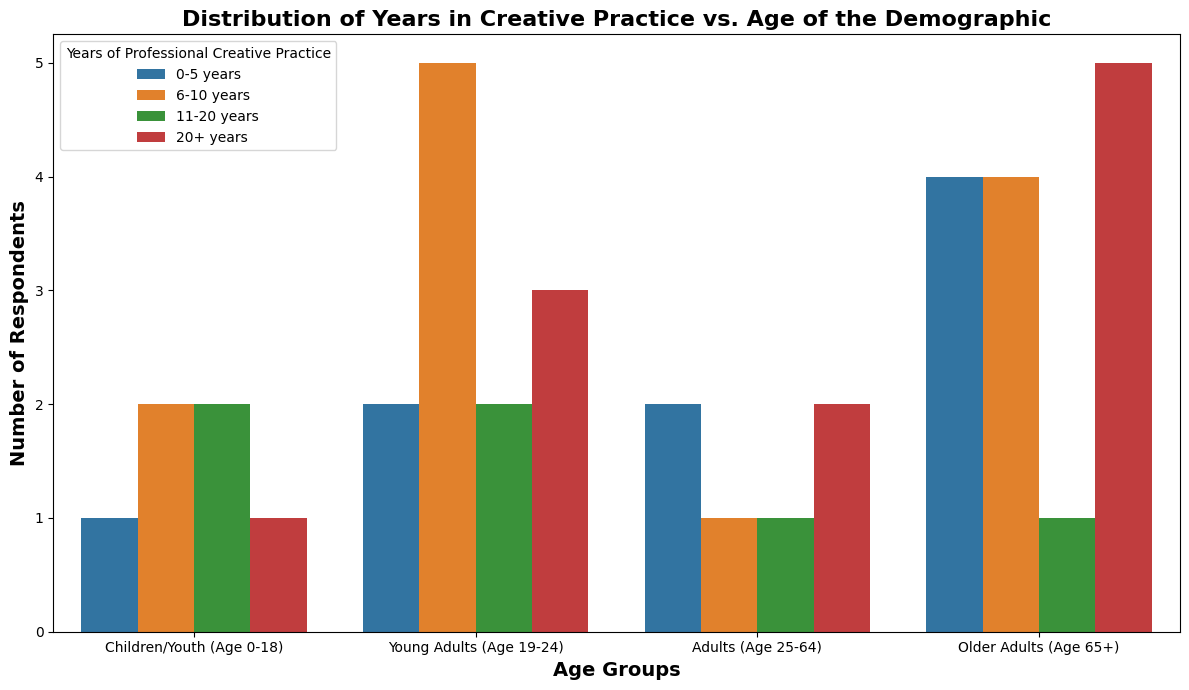

In [10]:
plt.figure(figsize=(12, 7))
sns.countplot(data=filtered_data, x="Age", hue="Years of Professional Creative Practice", order=[
    'Children/Youth (Age 0-18)', 'Young Adults (Age 19-24)', 'Adults (Age 25-64)', 'Older Adults (Age 65+)'
], hue_order=['0-5 years', '6-10 years', '11-20 years', '20+ years'])

# Adding title and labels
plt.title("Distribution of Years in Creative Practice vs. Age of the Demographic", fontweight='bold', fontsize=16)
plt.xlabel("Age Groups", fontweight='bold', fontsize=14)
plt.ylabel("Number of Respondents", fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Years of Professional Creative Practice")

# Display the plot
plt.tight_layout()
plt.show()

# Q2 Rate of Closing

In this part, I try to find any questions in the survey that relates to the closing business. Then, ther are two columns that have the relavent information. The question 'Did You Close Your Arts Business Recently' is the most direct question related to the question of rate of closing.

In [11]:
column_names = data.columns
potential_columns = [col for col in column_names if any(keyword in col.lower() for keyword in ["clos", "status", "shut", "down"])]
potential_columns

['Did You Close Your Arts Business Recently',
 'Reasons for Closing Arts Business']

Then, I check all the answers under this question.

In [12]:
print(data['Did You Close Your Arts Business Recently'].notna().sum())
print(data['Did You Close Your Arts Business Recently'].unique())

50
[nan 'No' 'Yes']


By filtering the by =='Yes', I get the total number of participants who close their business.

In [13]:
Closing_amount = (data['Did You Close Your Arts Business Recently']=='Yes').sum()
Closing_amount

23

Then, divied the amount of the closing by the total amount of participants, I get the rate of closing, which is **6.57%**.

In [14]:
Rate_of_closing = round((Closing_amount / data['Did You Close Your Arts Business Recently'].shape[0])*100, 2)
Rate_of_closing

6.57

# Q3 Years distribution vs Age

To get the answer about the years as an arts educator relative to age, I look up all the questions which contain the key words like 'arts educator', 'arts', and 'years'. Then there is a question, 'Years of Experience as Arts Educator' which contain the answers I want.

In [15]:
column_names = data.columns
potential_columns_1 = [col for col in column_names if any(keyword in col.lower() for keyword in ["arts educator", "arts", "years"])]
potential_columns_1


['Years of Professional Creative Practice',
 'Did You Close Your Arts Business Recently',
 'Reasons for Closing Arts Business',
 'Role Description as an Arts Educator',
 'Years of Experience as Arts Educator',
 'Years of Organization/Business Existence',
 'Does Your Organization Fund Arts Programming?',
 'Prior to 2020, how many arts events would you attend, and/or arts venues would you visit, in an average month?',
 'Online Arts Events Attendance in 2020',
 'Post pandemic restrictions (2022), how many arts events do you attend, and/or arts venues do you visit, in an average month?',
 'Arts Disciplines Experienced in Last Year',
 'Barriers to Arts Participation',
 'Relationships with Individuals in Arts',
 'Work/Volunteer in Arts Organization',
 'Yearly Contributions to Arts Organizations',
 'Change in Arts Contributions in Last Year',
 'Perceived Value of Arts to Communities',
 'Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an aver

However, after applying .isna() on this column, all of the entry under this column is Nan because the result is 350 when I sum the boolean result up. Hence, **the data is missing and the analysis cannot be done**. I think the reason behind this should be that the participants answered the survey question with various ways whihc cannot be conducted as the scalable result to be analyzed.

In [16]:
data['Years of Experience as Arts Educator'].notna().sum()

0

## Q4 Distribution of types of creative disciplines are taught 

I do the same process as before to find the question related to the analysis.

In [17]:
potential_columns_2 = [col for col in column_names if any(keyword in col.lower() for keyword in ["creative", "teach", "discipline"])]
potential_columns_2


['Describe Your Primary Role in Creative Sector',
 'Primary Creative Activity',
 'Years of Professional Creative Practice',
 'Income Details BEFORE COVID-19 Typical annual income from artistic/creative practice',
 'Income Details POST COVID-19 RESTRICTIONS (2022) Annual income from artistic/creative practice',
 'Is Your Creative Practice Full-time',
 'Rate Barriers to Success in Creative Practice Lack of the necessary equipment and/or technology',
 'Rate Barriers to Success in Creative Practice Access to affordable creative practice/development space',
 'Rate Barriers to Success in Creative Practice Access to affordable performance/presentation space',
 'Rate Barriers to Success in Creative Practice Access to funding',
 'Rate Barriers to Success in Creative Practice Lack of business management knowledge',
 'Rate Barriers to Success in Creative Practice No formal undergraduate, graduate, or informal technical skills training in your field',
 'Rate Barriers to Success in Creative Practic

In [18]:
data['Creative Disciplines You Teach'].notna().sum()

0

In the returned result, the 'Creative Disciplines You Teach' is the most direct question for the analysis. However, after checking the valid entry under this column, the same trouble is that there is **no data could be used**. 

# Q5 Distribution of Primary Roles as Arts Educators

To find the primary roles as arts educators, I found two columns which are related to this question. The first one is 'Describe Your Primary Role in Creative Sector' which could help to find the roles of arts educators. The second one is 'Primary Creative Activity' which could help to find the primary role of the arts educators. The following cell shows the answer of the primary role as arts educators. However, every participant answers a unique answer, which needs to be categorized.

In [19]:
data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)']['Primary Creative Activity'].value_counts()

Primary Creative Activity
Comedy                1
Dance                 1
Film Making           1
Theater               1
Installation Art      1
Poetry                1
Woodworking           1
Art Curation          1
Drawing               1
Graffiti              1
Culinary Arts         1
Performance Art       1
Game Design           1
Dance Choreography    1
Metalworking          1
Digital Art           1
Music Production      1
Calligraphy           1
Printmaking           1
Jewelry Making        1
Fashion Design        1
Puppetry              1
Mime                  1
Painting              1
Art Teaching          1
Textile Art           1
Web Design            1
Graphic Design        1
Video Art             1
Illustration          1
Street Art            1
Animation             1
Writing               1
Photography           1
Singing               1
Pottery               1
Crafts                1
Magic                 1
Stand-up Comedy       1
Sculpting             1
Acting        

In [20]:
data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)']['Primary Creative Activity'].value_counts()

Primary Creative Activity
Comedy                1
Dance                 1
Film Making           1
Theater               1
Installation Art      1
Poetry                1
Woodworking           1
Art Curation          1
Drawing               1
Graffiti              1
Culinary Arts         1
Performance Art       1
Game Design           1
Dance Choreography    1
Metalworking          1
Digital Art           1
Music Production      1
Calligraphy           1
Printmaking           1
Jewelry Making        1
Fashion Design        1
Puppetry              1
Mime                  1
Painting              1
Art Teaching          1
Textile Art           1
Web Design            1
Graphic Design        1
Video Art             1
Illustration          1
Street Art            1
Animation             1
Writing               1
Photography           1
Singing               1
Pottery               1
Crafts                1
Magic                 1
Stand-up Comedy       1
Sculpting             1
Acting        

In [21]:
# Define a dictionary to map each unique value to its category
category_dict = {
    'Comedy': 'Performing Arts',
    'Dance': 'Performing Arts',
    'Film Making': 'Media Arts',
    'Theater': 'Performing Arts',
    'Installation Art': 'Visual Arts',
    'Poetry': 'Literary Arts',
    'Woodworking': 'Crafts',
    'Art Curation': 'Visual Arts',
    'Drawing': 'Visual Arts',
    'Graffiti': 'Visual Arts',
    'Culinary Arts': 'Culinary Arts',
    'Performance Art': 'Performing Arts',
    'Game Design': 'Media Arts',
    'Dance Choreography': 'Performing Arts',
    'Metalworking': 'Crafts',
    'Digital Art': 'Media Arts',
    'Music Production': 'Music',
    'Calligraphy': 'Visual Arts',
    'Printmaking': 'Visual Arts',
    'Jewelry Making': 'Crafts',
    'Fashion Design': 'Fashion',
    'Puppetry': 'Performing Arts',
    'Mime': 'Performing Arts',
    'Painting': 'Visual Arts',
    'Art Teaching': 'Education',
    'Textile Art': 'Crafts',
    'Web Design': 'Media Arts',
    'Graphic Design': 'Media Arts',
    'Video Art': 'Media Arts',
    'Illustration': 'Visual Arts',
    'Street Art': 'Visual Arts',
    'Animation': 'Media Arts',
    'Writing': 'Literary Arts',
    'Photography': 'Visual Arts',
    'Singing': 'Music',
    'Pottery': 'Crafts',
    'Crafts': 'Crafts',
    'Magic': 'Performing Arts',
    'Stand-up Comedy': 'Performing Arts',
    'Sculpting': 'Visual Arts',
    'Acting': 'Performing Arts',
    'Mixed Media Art': 'Visual Arts',
    'Ceramics': 'Crafts',
    'Glass Blowing': 'Crafts'
}

data_categorized = data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)']['Primary Creative Activity'].replace(category_dict)

data_categorized.value_counts()

Primary Creative Activity
Visual Arts        12
Performing Arts    10
Crafts              8
Media Arts          7
Literary Arts       2
Music               2
Education           1
Culinary Arts       1
Fashion             1
Name: count, dtype: int64

The above cell categorizes the different unique responses into fewer categories for the purposes of analysis. The categorization dictionary is interpretated by AI and cross checked by the project team.

/tmp/ipykernel_2664/3765577310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=role_distribution.index, x=role_distribution.values, palette="viridis")


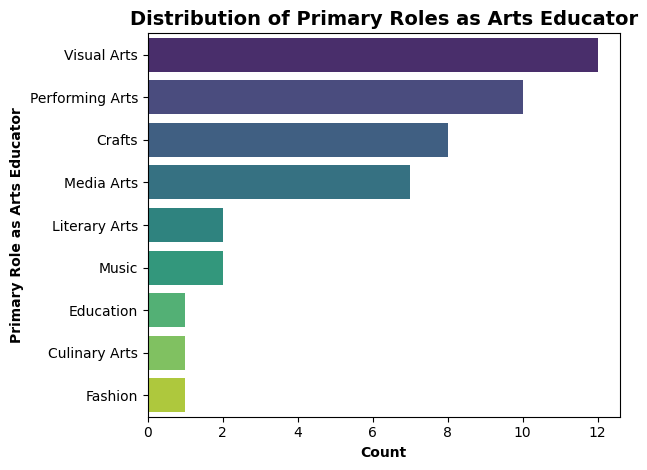

In [22]:
role_distribution = data_categorized.value_counts()

sns.barplot(y=role_distribution.index, x=role_distribution.values, palette="viridis")
plt.title("Distribution of Primary Roles as Arts Educator", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=10, fontweight='bold')
plt.ylabel("Primary Role as Arts Educator", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of primary roles held by arts educators. **Visual Arts** educators have the highest count, surpassing all other categories with over 10 representatives. On the contrary, **Fashion**, **Culinary Arts**, and **Education** has the least representation with just above 0, while categories like **Performing Arts** and **Crafts** also show notable counts, each with around 7 to 9 educators.

# Appendix for UI

The under cells are the data test and data processing while doing the UI development.

## UI#4a Figure for Space Needs Identified by Creative Entrepreneurs and Teaching Artists/Educators

In [23]:
data['Describe Your Primary Role in Creative Sector'].value_counts()

Describe Your Primary Role in Creative Sector
Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)                                                                50
Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)    50
Arts Funder (Foundations; national, state, and local arts agencies)                                                                                                                               50
Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)                                                     50
Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)                                                                 

In [24]:
column_names = data.columns
potential_columns = [col for col in column_names if any(keyword in col.lower() for keyword in ["space"])]
for i in potential_columns:
    print(i+ "/n")

Rate Barriers to Success in Creative Practice Access to affordable creative practice/development space/n
Rate Barriers to Success in Creative Practice Access to affordable performance/presentation space/n
Rate Barriers to Success for Artists/Educators Access to affordable creative practice/development space/n
Rate Barriers to Success for Artists/Educators Access to affordable performance/presentation space/n
Rate Barriers to Success in Your Organization Access to affordable creative practice/development space/n
Rate Barriers to Success in Your Organization Access to affordable performance/presentation space/n
Did the events of 2020 affect your need for a creative space?/n
How often do you find your current space options inadequate for the development or presentation of your creative practice?/n
What type of space do you mainly use for your creative work?/n
If you have work space, do you own or lease your own space?/n
If you have a workspace, what's your monthly cost (including rent/mor

In [25]:
data['What type of space do you mainly use for your creative work?'].unique()

print(data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)'][['How important are the following space types/amenities to your creative practice or business? Photography studio/dark room']].value_counts())
print(data[data['Describe Your Primary Role in Creative Sector'] == 'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)'][['How important are the following space types/amenities to your creative practice or business? Photography studio/dark room']].value_counts())



How important are the following space types/amenities to your creative practice or business? Photography studio/dark room
Nice to have but not important                                                                                               15
Not at all important                                                                                                         13
Somewhat important                                                                                                           13
Critically important                                                                                                          9
Name: count, dtype: int64
How important are the following space types/amenities to your creative practice or business? Photography studio/dark room
Somewhat important                                                                                                           17
Not at all important                                                                      

In [26]:
space_or_amenity_columns = [col for col in data.columns if 'how important' in col.lower()]
space_or_amenity_columns
amenity_list = []
for i in space_or_amenity_columns:
        word_list = i.split()
        print(word_list)
        # index = word_list.index('space')
        # rest_of_string = ' '.join(word_list[index+1:])
        # amenity_list.append(rest_of_string)



['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Photography', 'studio/dark', 'room']
['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Music', 'practice', 'room']
['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Music', 'recording', 'studio']
['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Computer', 'lab']
['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Individual', 'artist', 'studio', '(any', 'discipline)']
['How', 'important', 'are', 'the', 'following', 'space', 'types/amenities', 'to', 'your', 'creative', 'practice', 'or', 'business?', 'Shared', 'artist', 'studio

In [27]:
'If you need a specific space for art creation/presentation not listed, please describe your needs:'
data['If you need a specific space for art creation/presentation not listed, please describe your needs:']

0                            Printmaking Studio
1                 Customizable Exhibition Space
2                                           NaN
3                                           NaN
4                                           NaN
                         ...                   
345          Dance Studio with Mirrors and Bars
346          Dedicated mural and graffiti walls
347                                         NaN
348    Room with large floor space for movement
349                                         NaN
Name: If you need a specific space for art creation/presentation not listed, please describe your needs:, Length: 350, dtype: object

## UI#4b Figure for Space Needs for Arts Admiinstrators and Creative Workers

In [28]:
data[data['Describe Your Primary Role in Creative Sector'] == "Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)"][['What type of space do you mainly use for your creative work?']]




,What type of space do you mainly use for your creative work?
1,NaN
13,NaN
20,NaN
28,NaN
32,NaN
52,NaN
62,NaN
65,NaN
73,NaN
81,NaN


In [29]:
data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)'][['What type of space do you mainly use for your creative work?']]

,What type of space do you mainly use for your creative work?
1,NaN
13,NaN
20,NaN
28,NaN
32,NaN
52,NaN
62,NaN
65,NaN
73,NaN
81,NaN


In [30]:
(data[data['Describe Your Primary Role in Creative Sector']=='Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)'][['If you need a specific space for art creation/presentation not listed, please describe your needs:']])

,"If you need a specific space for art creation/presentation not listed, please describe your needs:"
0,Printmaking Studio
14,Multi-media Art Studio
15,Mobile studios for on-the-go creation
19,Experimental media labs
24,Green screens and film editing suites
31,Film Editing Suites
35,Photography Darkroom
37,3D Printing Lab
41,Glassblowing Studio
42,Dedicated spaces for indigenous art forms


/tmp/ipykernel_2664/3188605167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_df[col] = cw_df[col].replace(value_mapping)


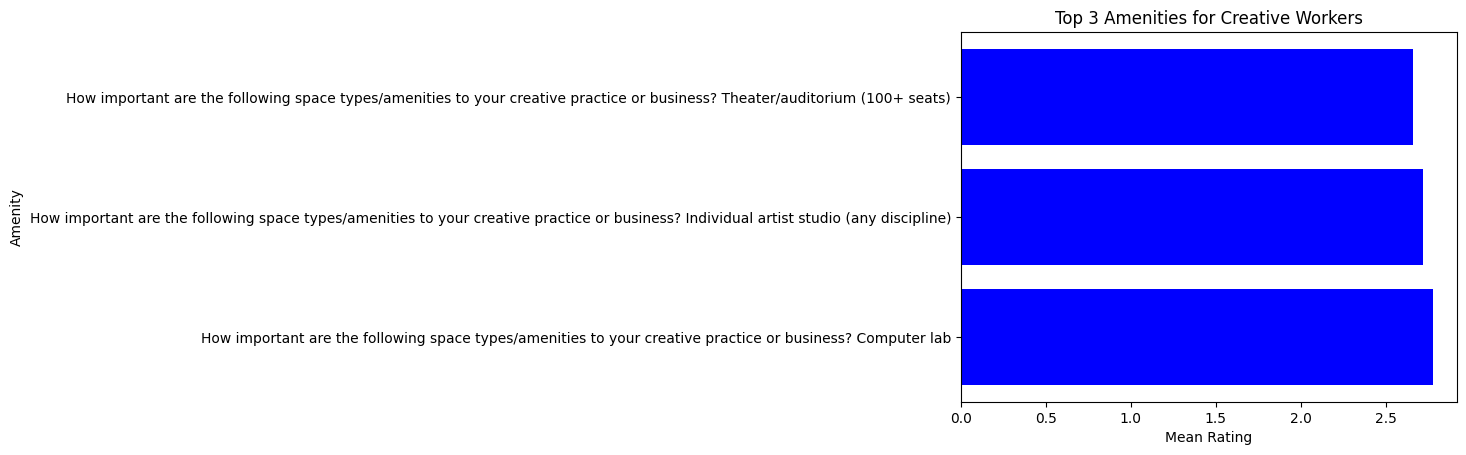

In [31]:
cw_df =data[data['Describe Your Primary Role in Creative Sector'] == 'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)']
colaborating_col = "How important are the following space types/amenities to your creative practice or business? Collaboration/networking events"
spaces = 'How important are the following space types/amenities to your creative practice or business? Photography studio/dark room'
space_or_amenity_columns = [col for col in cw_df.columns if 'how important' in col.lower()]
value_mapping = {
        "Not at all important": 1,
        "Nice to have but not important": 2,
        "Somewhat important": 3,
        "Critically important": 4
    }

for col in space_or_amenity_columns:
        cw_df[col] = cw_df[col].replace(value_mapping)

cw_df = cw_df.dropna(subset=space_or_amenity_columns)

melted_df = cw_df.melt(id_vars=[colaborating_col], value_vars=space_or_amenity_columns, var_name='Amenity', value_name='Rating')

  # Calculate the mean rating of each amenity
mean_ratings = melted_df.groupby('Amenity')['Rating'].mean().sort_values(ascending=False)

top3 = mean_ratings.head(3)

# Plot the top 3 amenities based on their mean rating using ax.barh()
fig, ax = plt.subplots()
ax.barh(top3.index, top3.values, color='blue')

# Set the title and axis labels
ax.set_title('Top 3 Amenities for Creative Workers')
ax.set_xlabel('Mean Rating')
ax.set_ylabel('Amenity')

plt.show()





In [32]:
aa_df = data[data['Describe Your Primary Role in Creative Sector'] == 'Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)']
colaborating_col = "How important are the following space types/amenities to your creative practice or business? Collaboration/networking events"
spaces = 'How important are the following space types/amenities to your creative practice or business? Photography studio/dark room'
space_or_amenity_columns = [col for col in aa_df.columns if 'how important' in col.lower()]
value_mapping = {
        "Not at all important": 1,
        "Nice to have but not important": 2,
        "Somewhat important": 3,
        "Critically important": 4
    }

for col in space_or_amenity_columns:
        aa_df[col] = aa_df[col].replace(value_mapping)

aa_df = aa_df.dropna(subset=space_or_amenity_columns)

melted_df = aa_df.melt(id_vars=[colaborating_col], value_vars=space_or_amenity_columns, var_name='Amenity', value_name='Rating')



/tmp/ipykernel_2664/2109923104.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_df[col] = aa_df[col].replace(value_mapping)


In [33]:
data['What additional features are important to you for an arts-business co-working space?'].unique()

array(['Member Discounts', 'Mail and Package Handling Services', nan,
       'Reception Services', 'Flexible Membership Plans',
       'Collaboration and networking opportunities',
       'Mentorship Programs', 'Member-driven workshops and seminars',
       'Air Conditioning and Heating', 'Kitchen and coffee facilities',
       'Fitness Center/Wellness Programs', 'Outdoor Space',
       'Private Meeting Rooms', 'Secure storage lockers', 'Phone Booths',
       'Conference Rooms', 'Access to printing and scanning facilities',
       'Clean Restrooms', 'Dedicated Desks', 'Ergonomic Furniture',
       'Ample Lighting', 'Event Spaces', 'Pet-friendly policies',
       'High-Speed Internet', 'Projector and Screen',
       'Lounge and relaxation areas', '24/7 Access',
       'Mail and package handling',
       'Event and workshop hosting opportunities', 'Kitchen Facilities',
       'On-Site Cafe', 'Ergonomic furniture', 'Comfortable Seating',
       'On-site support and maintenance services', 

In [34]:
# Define a dictionary to map each unique value to its category
category_dict = {
    'Member Discounts': 'Special Services',
    'Mail and Package Handling Services': 'Facilities and Infrastructure',
    'Reception Services': 'Facilities and Infrastructure',
    'Flexible Membership Plans': 'Facilities and Infrastructure',
    'Collaboration and networking opportunities': 'Work Environment and Productivity',
    'Mentorship Programs': 'Networking and Community',
    'Member-driven workshops and seminars': 'Networking and Community',
    'Air Conditioning and Heating': 'Facilities and Infrastructure',
    'Kitchen and coffee facilities': 'Facilities and Infrastructure',
    'Fitness Center/Wellness Programs': 'Special Services',
    'Outdoor Space': 'Facilities and Infrastructure',
    'Private Meeting Rooms': 'Facilities and Infrastructure',
    'Secure storage lockers': 'Facilities and Infrastructure',
    'Phone Booths': 'Facilities and Infrastructure',
    'Conference Rooms': 'Facilities and Infrastructure',
    'Access to printing and scanning facilities': 'Facilities and Infrastructure',
    'Clean Restrooms': 'Facilities and Infrastructure',
    'Dedicated Desks': 'Facilities and Infrastructure',
    'Ergonomic Furniture': 'Facilities and Infrastructure',
    'Ample Lighting': 'Facilities and Infrastructure',
    'Event Spaces': 'Facilities and Infrastructure',
    'Pet-friendly policies': 'Facilities and Infrastructure',
    'High-Speed Internet': 'Facilities and Infrastructure',
    'Projector and Screen': 'Facilities and Infrastructure',
    'Lounge and relaxation areas': 'Facilities and Infrastructure',
    '24/7 Access': 'Facilities and Infrastructure',
    'Mail and package handling': 'Facilities and Infrastructure',
    'Event and workshop hosting opportunities': 'Facilities and Infrastructure',
    'Kitchen Facilities': 'Facilities and Infrastructure',
    'On-Site Cafe': 'Facilities and Infrastructure',
    'Ergonomic furniture': 'Facilities and Infrastructure',
    'Comfortable Seating': 'Facilities and Infrastructure',
    'On-site support and maintenance services': 'Facilities and Infrastructure',
    'On-site tech support': 'Facilities and Infrastructure',
    'Affordable and competitive pricing': 'Facilities and Infrastructure',
    'Mail and Package Handling': 'Facilities and Infrastructure',
    'Gallery Space for Exhibiting': 'Facilities and Infrastructure',
    'Collaborative Environment': 'Work Environment and Productivity',
    'Diverse and Comfortable Workspaces': 'Work Environment and Productivity',
    'Friendly Community': 'Networking and Community',
    'Storage Space': 'Facilities and Infrastructure',
    'Printing Services': 'Facilities and Infrastructure',
    'Diverse and inclusive environment': 'Comfort and Inclusivity',
    'Fitness Center': 'Special Services',
    'Affordable Rent': 'Facilities and Infrastructure',
    'On-Site Technical Support': 'Facilities and Infrastructure',
    'Bike storage and shower facilities': 'Facilities and Infrastructure',
    'Wheelchair Accessibility': 'Facilities and Infrastructure',
    'Accessible Location': 'Facilities and Infrastructure',
    'Printer and scanner access': 'Facilities and Infrastructure',
    'Security Cameras': 'Facilities and Infrastructure',
    'Networking Opportunities': 'Networking and Community',
    'Collaboration Spaces': 'Work Environment and Productivity',
    'Recreational Facilities': 'Facilities and Infrastructure',
    'Printing and Copying Services': 'Facilities and Infrastructure',
    'Member discounts and perks': 'Special Services',
    'Digital Equipment': 'Facilities and Infrastructure',
    'Pet-Friendly': 'Comfort and Inclusivity',
    'Mail and package handling services': 'Facilities and Infrastructure',
    'Access to Legal and Business Advisors': 'Special Services',
    'Childcare Services': 'Special Services',
    'Reception and Front Desk Services': 'Facilities and Infrastructure',
    'High-speed internet and digital resources': 'Facilities and Infrastructure',
    'Workshops and Classes': 'Networking and Community',
    'Networking and Social Events': 'Networking and Community',
    'Sound System': 'Facilities and Infrastructure',
    'Quiet zones for focused work': 'Work Environment and Productivity',
    'Makerspace with Tools': 'Facilities and Infrastructure',
    'Kitchen and Break Areas': 'Facilities and Infrastructure',
    'Dedicated Desk Space': 'Facilities and Infrastructure',
    'Shower Facilities': 'Facilities and Infrastructure',
    'Bike Storage': 'Facilities and Infrastructure',
    'Free Coffee and Tea': 'Facilities and Infrastructure',
    'Free Parking': 'Facilities and Infrastructure',
    'Art Supplies': 'Facilities and Infrastructure',
    'Storage Lockers': 'Facilities and Infrastructure',
    'Security Features': 'Facilities and Infrastructure',
    'Environmentally sustainable practices': 'Comfort and Inclusivity',
    'Flexible Lease Terms': 'Facilities and Infrastructure',
    'Quiet Zones': 'Work Environment and Productivity',
    'Accessibility features': 'Facilities and Infrastructure',
    'Outdoor Areas': 'Facilities and Infrastructure',
    'Showcase Events': 'Facilities and Infrastructure',
    'Outdoor Workspaces': 'Facilities and Infrastructure',
    'Outdoor and recreational spaces': 'Facilities and Infrastructure',
    'Professional and friendly management': 'Comfort and Inclusivity',
    'Networking Events': 'Networking and Community',
    'Event Space': 'Facilities and Infrastructure',
    'Soundproof Rooms': 'Facilities and Infrastructure',
    'Access to mentorship and professional development': 'Networking and Community',
    'Security and privacy measures': 'Facilities and Infrastructure',
    'Counseling and Mentorship': 'Special Services',
    'Regular networking events': 'Networking and Community',
    'Conference and meeting rooms availability': 'Facilities and Infrastructure',
    'Private Phone Booths': 'Facilities and Infrastructure',
    'Lounge Area': 'Facilities and Infrastructure',
    'Flexible desk arrangements': 'Work Environment and Productivity',
    'Flexible and diverse working spaces': 'Work Environment and Productivity',
    'Workshop and fabrication tools': 'Facilities and Infrastructure',
    'Green and Sustainable Features': 'Comfort and Inclusivity',
    'Green and sustainable practices': 'Comfort and Inclusivity',
    'Conference Rooms with AV Equipment': 'Facilities and Infrastructure',
    'Availability of equipment and technology': 'Facilities and Infrastructure',
    'Security': 'Facilities and Infrastructure',
    'Access to mentors and advisors': 'Networking and Community',
    'Cafeteria/Coffee Shop': 'Facilities and Infrastructure',
    '24/7 access and flexibility': 'Facilities and Infrastructure',
    'Proximity to public transportation and parking': 'Facilities and Infrastructure',
    'Comfortable and ergonomic furniture': 'Facilities and Infrastructure',
    '24/7 access': 'Facilities and Infrastructure',
    'Kitchen and break room amenities': 'Facilities and Infrastructure',
    'Inclusive and accessible design': 'Comfort and Inclusivity',
    'Friendly and inspiring community': 'Networking and Community'
}

# Replace the original values with the categorized values
data['What additional features are important to you for an arts-business co-working space?'] = data['What additional features are important to you for an arts-business co-working space?'].map(category_dict)

# Print the unique values in the column to verify the categorization
print(data['What additional features are important to you for an arts-business co-working space?'].unique())

['Special Services' 'Facilities and Infrastructure' nan
 'Work Environment and Productivity' 'Networking and Community'
 'Comfort and Inclusivity']


In [35]:
cw_df = data[data['Describe Your Primary Role in Creative Sector']== 'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)']
additional_space = 'What additional features are important to you for an arts-business co-working space?'
values = cw_df['What additional features are important to you for an arts-business co-working space?'].dropna().value_counts()
values.index.to_list()

aa_df = data[data['Describe Your Primary Role in Creative Sector']=='Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)']
additional_space = 'What additional features are important to you for an arts-business co-working space?'
values = aa_df['What additional features are important to you for an arts-business co-working space?'].dropna().value_counts()
values.index.to_list()

['Facilities and Infrastructure',
 'Work Environment and Productivity',
 'Comfort and Inclusivity',
 'Special Services',
 'Networking and Community']

/tmp/ipykernel_2664/413605278.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_df[additional_space] = cw_df[additional_space].replace(categoried_dictionary)


0                       Special Services
14              Networking and Community
15              Networking and Community
19         Facilities and Infrastructure
24         Facilities and Infrastructure
31         Facilities and Infrastructure
35         Facilities and Infrastructure
37         Facilities and Infrastructure
41         Facilities and Infrastructure
42         Facilities and Infrastructure
45         Facilities and Infrastructure
49         Facilities and Infrastructure
60         Facilities and Infrastructure
63         Facilities and Infrastructure
79         Facilities and Infrastructure
90               Comfort and Inclusivity
94         Facilities and Infrastructure
99         Facilities and Infrastructure
106        Facilities and Infrastructure
116    Work Environment and Productivity
118        Facilities and Infrastructure
124                     Special Services
131                                  NaN
139                     Special Services
156             

/tmp/ipykernel_2664/413605278.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(value_counts.index)[::-1], fontsize=8)


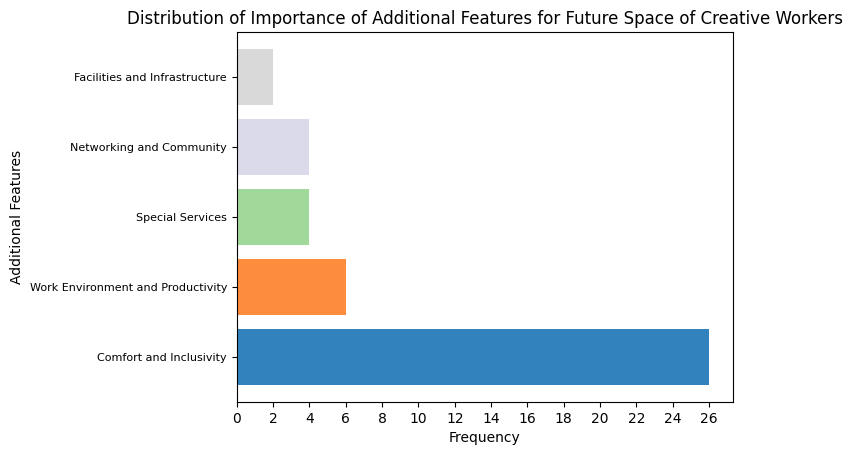

In [36]:
categoried_dictionary = {
    'Member Discounts': 'Member Services',
    'Showcase Events': 'Networking and Community',
    'Networking Events': 'Networking and Community',
    'Regular networking events': 'Networking and Community',
    'Access to mentors and advisors': 'Networking and Community',
    'Mentorship Programs': 'Networking and Community',
    'Member-driven workshops and seminars': 'Networking and Community',
    'Friendly and inspiring community': 'Networking and Community',
    'Private meeting rooms': 'Facilities and Infrastructure',
    'High-speed internet': 'Facilities and Infrastructure',
    'High-speed Internet': 'Facilities and Infrastructure',
    'Storage Lockers': 'Facilities and Infrastructure',
    'Secure storage lockers': 'Facilities and Infrastructure',
    'Outdoor Areas': 'Facilities and Infrastructure',
    'Outdoor workspaces': 'Facilities and Infrastructure',
    'Security': 'Facilities and Infrastructure',
    'Cafeteria/Coffee Shop': 'Facilities and Infrastructure',
    'Kitchen and coffee facilities': 'Facilities and Infrastructure',
    'Fitness Center': 'Special Services',
    'Conference Rooms': 'Facilities and Infrastructure',
    'Dedicated Desks': 'Facilities and Infrastructure',
    'Ergonomic Furniture': 'Facilities and Infrastructure',
    'Ergonomic furniture': 'Facilities and Infrastructure',
    'Event Spaces': 'Facilities and Infrastructure',
    'Lounge and relaxation areas': 'Facilities and Infrastructure',
    'Childcare Services': 'Special Services',
    'Bike storage and shower facilities': 'Special Services',
    'Printer and scanner access': 'Facilities and Infrastructure',
    'Collaboration Spaces': 'Facilities and Infrastructure',
    'Recreational Facilities': 'Facilities and Infrastructure',
    'Quiet Zones': 'Work Environment and Productivity',
    'Quiet zones for focused work': 'Work Environment and Productivity',
    'Private Phone Booths': 'Work Environment and Productivity',
    'Flexible desk arrangements': 'Work Environment and Productivity',
    'Workshop and fabrication tools': 'Work Environment and Productivity',
    'Green and sustainable practices': 'Work Environment and Productivity',
    '24/7 access': 'Work Environment and Productivity',
    '24/7 Access': 'Work Environment and Productivity',
    'On-site tech support': 'Work Environment and Productivity',
    'Printing Services': 'Work Environment and Productivity',
    'Mail and Package Handling': 'Member Services',
    'Mail and package handling': 'Member Services',
    'Member discounts and perks': 'Member Services',
    'Accessibility features': 'Comfort and Inclusivity',
    'Pet-friendly': 'Comfort and Inclusivity',
    'Pet-friendly policies': 'Comfort and Inclusivity',
    'Diverse and inclusive environment': 'Comfort and Inclusivity'
}


cw_df = data[data['Describe Your Primary Role in Creative Sector'] == 'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)']
additional_space = 'What additional features are important to you for an arts-business co-working space?'

# Replace the information in the data with the categorized_dictionary
cw_df[additional_space] = cw_df[additional_space].replace(categoried_dictionary)
display(cw_df[additional_space])
values = cw_df[additional_space].dropna().value_counts()
values_dict = values.to_dict()
colors = plt.cm.tab20c(np.linspace(0, 1, len(values_dict)))
value_counts = cw_df[additional_space].value_counts()

fig, ax = plt.subplots()
ax.barh(cw_df[additional_space].value_counts().index, cw_df[additional_space].value_counts().values, color=colors)

ax.set_yticklabels(list(value_counts.index)[::-1], fontsize=8)
ax.set_xticks(range(0, max(value_counts.values)+1, 2))
ax.set_xlabel('Frequency')
ax.set_ylabel('Additional Features')
ax.set_title('Distribution of Importance of Additional Features for Future Space of Creative Workers')

plt.show()





In [37]:
aa_df = data[data['Describe Your Primary Role in Creative Sector']=='Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)']
additional_space = 'What additional features are important to you for an arts-business co-working space?'
values = aa_df['What additional features are important to you for an arts-business co-working space?'].dropna().value_counts()
values.index.to_list()

['Facilities and Infrastructure',
 'Work Environment and Productivity',
 'Comfort and Inclusivity',
 'Special Services',
 'Networking and Community']

What additional features are important to you for an arts-business co-working space?
Facilities and Infrastructure        31
Work Environment and Productivity     4
Comfort and Inclusivity               3
Special Services                      2
Networking and Community              2
Name: count, dtype: int64


/tmp/ipykernel_2664/4205934673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_df[additional_space] = aa_df[additional_space].replace(categoried_dictionary_1)
/tmp/ipykernel_2664/4205934673.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(value_counts.index), fontsize=8)


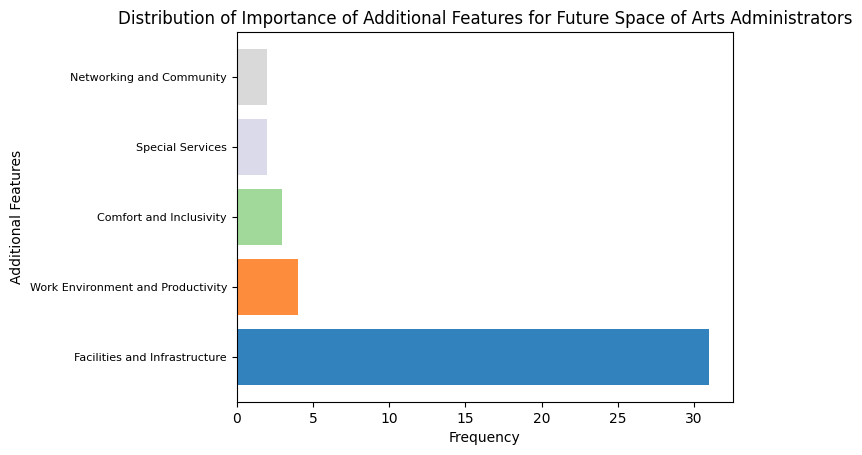

In [38]:
categoried_dictionary_1 = {
    'Diverse and Comfortable Workspaces': 'Facilities and Infrastructure',
    'Kitchen and Break Areas': 'Facilities and Infrastructure',
    'Conference Rooms with AV Equipment': 'Facilities and Infrastructure',
    'Comfortable and ergonomic furniture': 'Facilities and Infrastructure',
    'Flexible and diverse working spaces': 'Facilities and Infrastructure',
    'Conference and meeting rooms availability': 'Facilities and Infrastructure',
    'Outdoor and recreational spaces': 'Facilities and Infrastructure',
    'Outdoor Workspaces': 'Facilities and Infrastructure',
    'Fitness Center/Wellness Programs': 'Facilities and Infrastructure',
    'High-Speed Internet': 'Connectivity and Technology',
    'High-speed internet and digital resources': 'Connectivity and Technology',
    'Availability of equipment and technology': 'Connectivity and Technology',
    'On-Site Technical Support': 'Connectivity and Technology',
    'Mail and Package Handling Services': 'Services and Support',
    'Printing and Copying Services': 'Services and Support',
    'Reception and Front Desk Services': 'Services and Support',
    'On-site support and maintenance services': 'Services and Support',
    'Access to printing and scanning facilities': 'Services and Support',
    'Mail and package handling services': 'Services and Support',
    '24/7 access and flexibility': 'Accessibility and Convenience',
    'Proximity to public transportation and parking': 'Accessibility and Convenience',
    '24/7 Access': 'Accessibility and Convenience',
    'Flexible Lease Terms': 'Accessibility and Convenience',
    'Inclusive and accessible design': 'Accessibility and Convenience',
    'Security and privacy measures': 'Security and Privacy',
    'Security Features': 'Security and Privacy',
    'Access to mentorship and professional development': 'Networking and Professional Development',
    'Collaboration and networking opportunities': 'Networking and Professional Development',
    'Networking and Social Events': 'Networking and Professional Development',
    'Access to Legal and Business Advisors': 'Networking and Professional Development',
    'Event and workshop hosting opportunities': 'Networking and Professional Development',
    'Professional and friendly management': 'Management and Operations',
    'Affordable and competitive pricing': 'Management and Operations',
    'Environmentally sustainable practices': 'Environment and Sustainability',
    'Private Phone Booths': 'Amenities and Comforts',
    'Kitchen and break room amenities': 'Amenities and Comforts'
}

aa_df = data[data['Describe Your Primary Role in Creative Sector']=='Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)']


aa_df[additional_space] = aa_df[additional_space].replace(categoried_dictionary_1)
values = aa_df[additional_space].dropna().value_counts()
values_dict = values.to_dict()
aspects = list(values_dict.keys())
colors = plt.cm.tab20c(np.linspace(0, 1, len(aspects)))
value_counts = aa_df[additional_space].value_counts()
print(value_counts)
fig, ax = plt.subplots()
ax.barh(aa_df[additional_space].value_counts().index, aa_df[additional_space].value_counts().values, color=colors)

ax.set_yticklabels(list(value_counts.index), fontsize=8)
ax.set_xlabel('Frequency')
ax.set_ylabel('Additional Features')
ax.set_title('Distribution of Importance of Additional Features for Future Space of Arts Administrators')

for tick in ax.yaxis.get_ticklabels():
    tick.set_ha('right')

plt.show()